In [1]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import random

C:\Users\brian\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load the data in text form separated by commas
brainT = np.loadtxt('Braintumor.csv', delimiter = ',', skiprows = 1)

In [3]:
#check the shape
print(brainT.shape)

(3762, 14)


In [4]:
#change the format so calculations and reading are easier
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})

In [5]:
# Shuffle the datasets
import random
brainT 
np.random.shuffle(brainT)
print(brainT)

[[ 0.0  21.6  1171.8 ...  4.0  1.0  0.0]
 [ 0.0  5.8  171.8 ...  2.5  0.9  0.0]
 [ 1.0  14.4  575.3 ...  3.3  1.0  0.0]
 ...
 [ 0.0  9.6  422.6 ...  3.2  1.0  0.0]
 [ 1.0  10.1  1129.3 ...  6.0  1.0  0.0]
 [ 0.0  7.2  476.6 ...  3.2  1.0  0.0]]


In [6]:
#Dropping everything below 60% accuracy
brainT = np.delete(brainT, 13, axis = 1)
brainT = np.delete(brainT, 12, axis = 1)
brainT = np.delete(brainT, 11, axis = 1)
brainT = np.delete(brainT, 10, axis = 1)
brainT = np.delete(brainT, 8, axis = 1)
brainT = np.delete(brainT, 7, axis = 1)
brainT = np.delete(brainT, 6, axis = 1)
brainT = np.delete(brainT, 5, axis = 1)
brainT = np.delete(brainT, 3, axis = 1)
brainT = np.delete(brainT, 2, axis = 1)
brainT = np.delete(brainT, 1, axis = 1)
print(brainT)

[[ 0.0  0.1  0.1]
 [ 0.0  0.1  0.0]
 [ 1.0  0.0  0.0]
 ...
 [ 0.0  0.1  0.1]
 [ 1.0  0.0  0.0]
 [ 0.0  0.2  0.2]]


In [7]:
# Split into training and validation, 30% validation set and 70% training 
index_30percent = int(0.3 * len(brainT[:, 0]))
print(index_30percent)
XVALID = brainT[:index_30percent, 1:]
YVALID = brainT[:index_30percent, :1]
XTRAIN = brainT[index_30percent:, 1:]
YTRAIN = brainT[index_30percent:, :1]

1128


In [8]:
#import tensorflow for neuron netowrk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [9]:
#build model for Training
model = Sequential()
model.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

Epoch 1/500
83/83 [==============================] - 2s 9ms/step - loss: 0.6869 - accuracy: 0.4989 - val_loss: 0.6768 - val_accuracy: 0.5417
Epoch 2/500
83/83 [==============================] - 0s 5ms/step - loss: 0.6688 - accuracy: 0.5573 - val_loss: 0.6664 - val_accuracy: 0.5417
Epoch 3/500
83/83 [==============================] - 0s 5ms/step - loss: 0.6583 - accuracy: 0.5573 - val_loss: 0.6572 - val_accuracy: 0.5417
Epoch 4/500
83/83 [==============================] - 0s 5ms/step - loss: 0.6485 - accuracy: 0.5573 - val_loss: 0.6470 - val_accuracy: 0.5417
Epoch 5/500
83/83 [==============================] - 0s 5ms/step - loss: 0.6377 - accuracy: 0.5573 - val_loss: 0.6358 - val_accuracy: 0.5417
Epoch 6/500
83/83 [==============================] - 0s 5ms/step - loss: 0.6258 - accuracy: 0.5573 - val_loss: 0.6234 - val_accuracy: 0.5417
Epoch 7/500
83/83 [==============================] - 0s 5ms/step - loss: 0.6130 - accuracy: 0.5573 - val_loss: 0.6104 - val_accuracy: 0.5417
Epoch 8/500
8

Epoch 59/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1458 - accuracy: 0.9746 - val_loss: 0.1489 - val_accuracy: 0.9716
Epoch 60/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1443 - accuracy: 0.9746 - val_loss: 0.1475 - val_accuracy: 0.9716
Epoch 61/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1428 - accuracy: 0.9746 - val_loss: 0.1460 - val_accuracy: 0.9725
Epoch 62/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1414 - accuracy: 0.9746 - val_loss: 0.1447 - val_accuracy: 0.9716
Epoch 63/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1401 - accuracy: 0.9746 - val_loss: 0.1435 - val_accuracy: 0.9716
Epoch 64/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1387 - accuracy: 0.9746 - val_loss: 0.1424 - val_accuracy: 0.9716
Epoch 65/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1378 - accuracy: 0.9746 - val_loss: 0.1413 - val_accuracy: 0.9725
Epoch 

83/83 [==============================] - 0s 5ms/step - loss: 0.1196 - accuracy: 0.9746 - val_loss: 0.1241 - val_accuracy: 0.9734
Epoch 117/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1195 - accuracy: 0.9746 - val_loss: 0.1240 - val_accuracy: 0.9734
Epoch 118/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1194 - accuracy: 0.9746 - val_loss: 0.1239 - val_accuracy: 0.9743
Epoch 119/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1193 - accuracy: 0.9746 - val_loss: 0.1239 - val_accuracy: 0.9734
Epoch 120/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1193 - accuracy: 0.9746 - val_loss: 0.1238 - val_accuracy: 0.9734
Epoch 121/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1192 - accuracy: 0.9749 - val_loss: 0.1239 - val_accuracy: 0.9734
Epoch 122/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1192 - accuracy: 0.9746 - val_loss: 0.1237 - val_accuracy: 0.9734
Epoch 123/500

83/83 [==============================] - 0s 5ms/step - loss: 0.1173 - accuracy: 0.9749 - val_loss: 0.1223 - val_accuracy: 0.9734
Epoch 174/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1174 - accuracy: 0.9746 - val_loss: 0.1222 - val_accuracy: 0.9734
Epoch 175/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1173 - accuracy: 0.9749 - val_loss: 0.1223 - val_accuracy: 0.9734
Epoch 176/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1173 - accuracy: 0.9753 - val_loss: 0.1224 - val_accuracy: 0.9734
Epoch 177/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1174 - accuracy: 0.9746 - val_loss: 0.1223 - val_accuracy: 0.9734
Epoch 178/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1173 - accuracy: 0.9746 - val_loss: 0.1221 - val_accuracy: 0.9743
Epoch 179/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1173 - accuracy: 0.9753 - val_loss: 0.1221 - val_accuracy: 0.9743
Epoch 180/500

83/83 [==============================] - 0s 5ms/step - loss: 0.1169 - accuracy: 0.9746 - val_loss: 0.1218 - val_accuracy: 0.9752
Epoch 231/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1169 - accuracy: 0.9749 - val_loss: 0.1218 - val_accuracy: 0.9743
Epoch 232/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1168 - accuracy: 0.9757 - val_loss: 0.1219 - val_accuracy: 0.9734
Epoch 233/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1169 - accuracy: 0.9746 - val_loss: 0.1218 - val_accuracy: 0.9743
Epoch 234/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1169 - accuracy: 0.9746 - val_loss: 0.1218 - val_accuracy: 0.9743
Epoch 235/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1169 - accuracy: 0.9746 - val_loss: 0.1218 - val_accuracy: 0.9743
Epoch 236/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1168 - accuracy: 0.9749 - val_loss: 0.1217 - val_accuracy: 0.9752
Epoch 237/500

83/83 [==============================] - 0s 5ms/step - loss: 0.1167 - accuracy: 0.9749 - val_loss: 0.1216 - val_accuracy: 0.9752
Epoch 288/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1166 - accuracy: 0.9768 - val_loss: 0.1218 - val_accuracy: 0.9734
Epoch 289/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1166 - accuracy: 0.9749 - val_loss: 0.1217 - val_accuracy: 0.9743
Epoch 290/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1167 - accuracy: 0.9753 - val_loss: 0.1218 - val_accuracy: 0.9734
Epoch 291/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1167 - accuracy: 0.9753 - val_loss: 0.1217 - val_accuracy: 0.9743
Epoch 292/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1167 - accuracy: 0.9753 - val_loss: 0.1217 - val_accuracy: 0.9743
Epoch 293/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1167 - accuracy: 0.9757 - val_loss: 0.1217 - val_accuracy: 0.9743
Epoch 294/500

83/83 [==============================] - 0s 4ms/step - loss: 0.1167 - accuracy: 0.9749 - val_loss: 0.1217 - val_accuracy: 0.9743
Epoch 345/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1166 - accuracy: 0.9765 - val_loss: 0.1218 - val_accuracy: 0.9743
Epoch 346/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1166 - accuracy: 0.9753 - val_loss: 0.1216 - val_accuracy: 0.9752
Epoch 347/500
83/83 [==============================] - 0s 6ms/step - loss: 0.1166 - accuracy: 0.9753 - val_loss: 0.1216 - val_accuracy: 0.9752
Epoch 348/500
83/83 [==============================] - 0s 6ms/step - loss: 0.1166 - accuracy: 0.9761 - val_loss: 0.1217 - val_accuracy: 0.9743
Epoch 349/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1166 - accuracy: 0.9746 - val_loss: 0.1217 - val_accuracy: 0.9752
Epoch 350/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1166 - accuracy: 0.9757 - val_loss: 0.1217 - val_accuracy: 0.9743
Epoch 351/500

83/83 [==============================] - 0s 3ms/step - loss: 0.1167 - accuracy: 0.9761 - val_loss: 0.1217 - val_accuracy: 0.9743
Epoch 402/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1167 - accuracy: 0.9757 - val_loss: 0.1218 - val_accuracy: 0.9743
Epoch 403/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1166 - accuracy: 0.9753 - val_loss: 0.1220 - val_accuracy: 0.9734
Epoch 404/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1167 - accuracy: 0.9746 - val_loss: 0.1217 - val_accuracy: 0.9752
Epoch 405/500
83/83 [==============================] - 0s 3ms/step - loss: 0.1166 - accuracy: 0.9765 - val_loss: 0.1217 - val_accuracy: 0.9752
Epoch 406/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1167 - accuracy: 0.9749 - val_loss: 0.1217 - val_accuracy: 0.9743
Epoch 407/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1167 - accuracy: 0.9761 - val_loss: 0.1218 - val_accuracy: 0.9743
Epoch 408/500

83/83 [==============================] - 0s 4ms/step - loss: 0.1167 - accuracy: 0.9757 - val_loss: 0.1218 - val_accuracy: 0.9752
Epoch 459/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1167 - accuracy: 0.9761 - val_loss: 0.1217 - val_accuracy: 0.9752
Epoch 460/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1167 - accuracy: 0.9761 - val_loss: 0.1218 - val_accuracy: 0.9752
Epoch 461/500
83/83 [==============================] - 0s 3ms/step - loss: 0.1167 - accuracy: 0.9753 - val_loss: 0.1218 - val_accuracy: 0.9752
Epoch 462/500
83/83 [==============================] - 0s 3ms/step - loss: 0.1167 - accuracy: 0.9757 - val_loss: 0.1218 - val_accuracy: 0.9752
Epoch 463/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1167 - accuracy: 0.9757 - val_loss: 0.1218 - val_accuracy: 0.9743
Epoch 464/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1167 - accuracy: 0.9753 - val_loss: 0.1217 - val_accuracy: 0.9752
Epoch 465/500

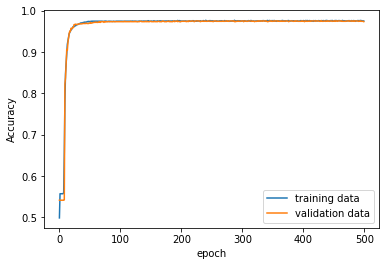

In [10]:
#compile and fit the model with 500 epochs
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

checkpoint = ModelCheckpoint('N5check.h5', monitor = 'val_accuracy', save_best_only = True, mode = 'max', verbose = 1)

# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs = 500)

# Check what's in the history
print(history.params)

# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [11]:
accuracy = model.evaluate(XTRAIN, YTRAIN)

83/83 [==============================] - 0s 2ms/step - loss: 0.1167 - accuracy: 0.9746


In [12]:
accuracy = model.evaluate(XVALID, YVALID)

36/36 [==============================] - 0s 2ms/step - loss: 0.1220 - accuracy: 0.9734


In [13]:
print(YTRAIN[:5])
predictions = model.predict(XTRAIN)
print(predictions[:5])

[[ 1.0]
 [ 0.0]
 [ 1.0]
 [ 1.0]
 [ 1.0]]
83/83 [==============================] - 0s 2ms/step
[[ 1.0]
 [ 0.0]
 [ 1.0]
 [ 0.0]
 [ 1.0]]


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision = precision_score(YTRAIN, predictions.round())
print(precision)
recall = recall_score(YTRAIN, predictions.round())
print(recall)
f1 = f1_score(YTRAIN,predictions.round())
print(f1)

0.9884444444444445
0.9536878216123499
0.9707551287647315


In [15]:
print(YVALID[:5])
predictions = model.predict(XVALID)
print(predictions[:5])

[[ 0.0]
 [ 0.0]
 [ 1.0]
 [ 0.0]
 [ 1.0]]
36/36 [==============================] - 0s 2ms/step
[[ 0.1]
 [ 0.2]
 [ 0.6]
 [ 0.0]
 [ 0.9]]


In [16]:
precision = precision_score(YVALID, predictions.round())
print(precision)
recall = recall_score(YVALID, predictions.round())
print(recall)
f1 = f1_score(YVALID,predictions.round())
print(f1)

0.9860279441117764
0.9555125725338491
0.9705304518664046
